In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../../')
from utils.constants import TOOLS_ORDER
from utils.dataloader import get_issues

sns.set(style='whitegrid')

issues = get_issues()

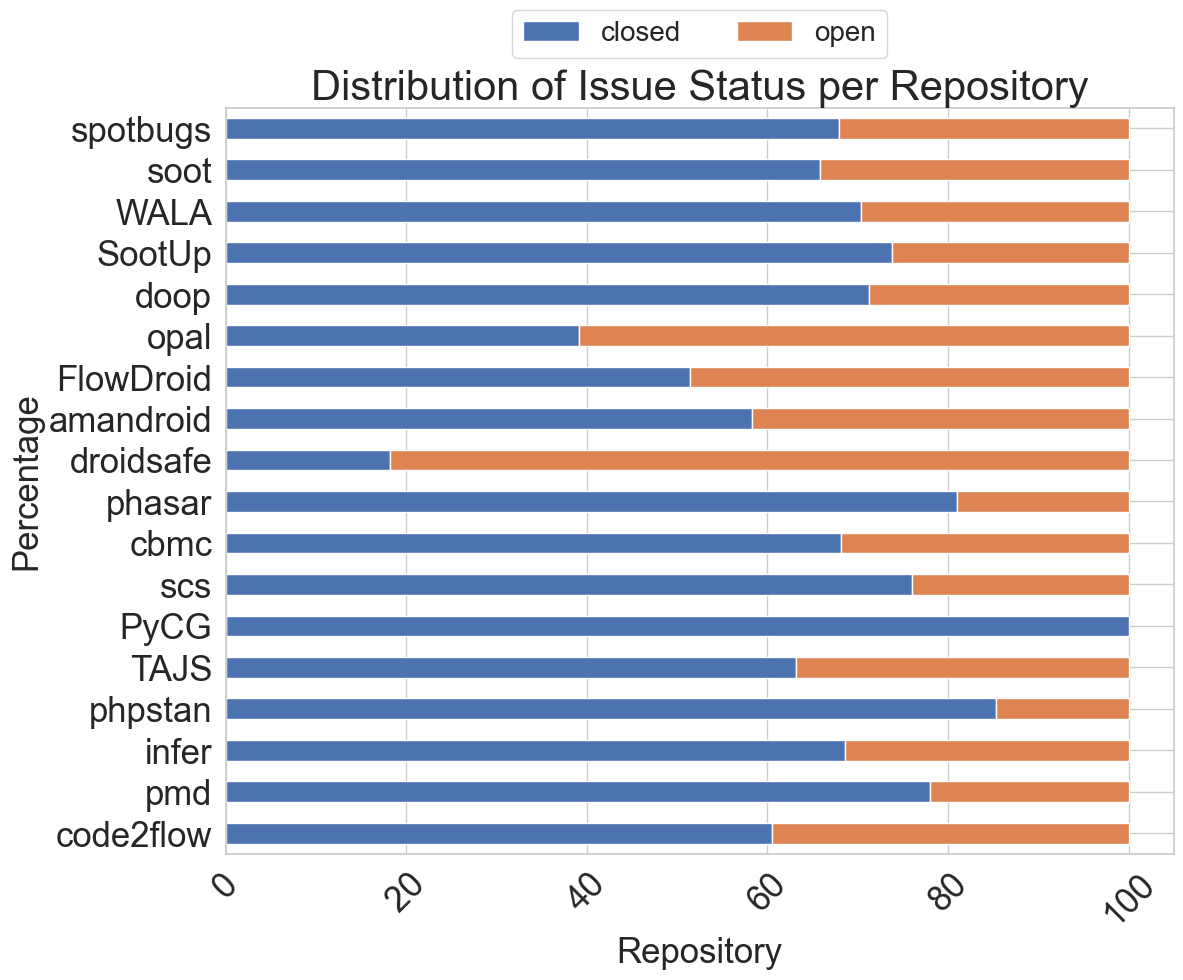

In [11]:
# The distribution of the status of the issues
# separate into per repo
# Calculate total number of issues per repo and sort
per_repo_status = issues.groupby(['tool_name', 'prop:state']).size().unstack(fill_value=0)
# Reindex to match the order in TOOLS_ORDER
per_repo_status = per_repo_status.reindex(TOOLS_ORDER[::-1])

# convert to percentage
per_repo_status_percentage = per_repo_status.div(per_repo_status.sum(axis=1), axis=0) * 100

# Plotting the distribution of the status of the issues
per_repo_status_percentage.plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Distribution of Issue Status per Repository', fontsize=30)
plt.xlabel('Repository', fontsize=25)
plt.ylabel('Percentage', fontsize=25)
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/state.pdf', format='pdf', dpi=300)
plt.show()

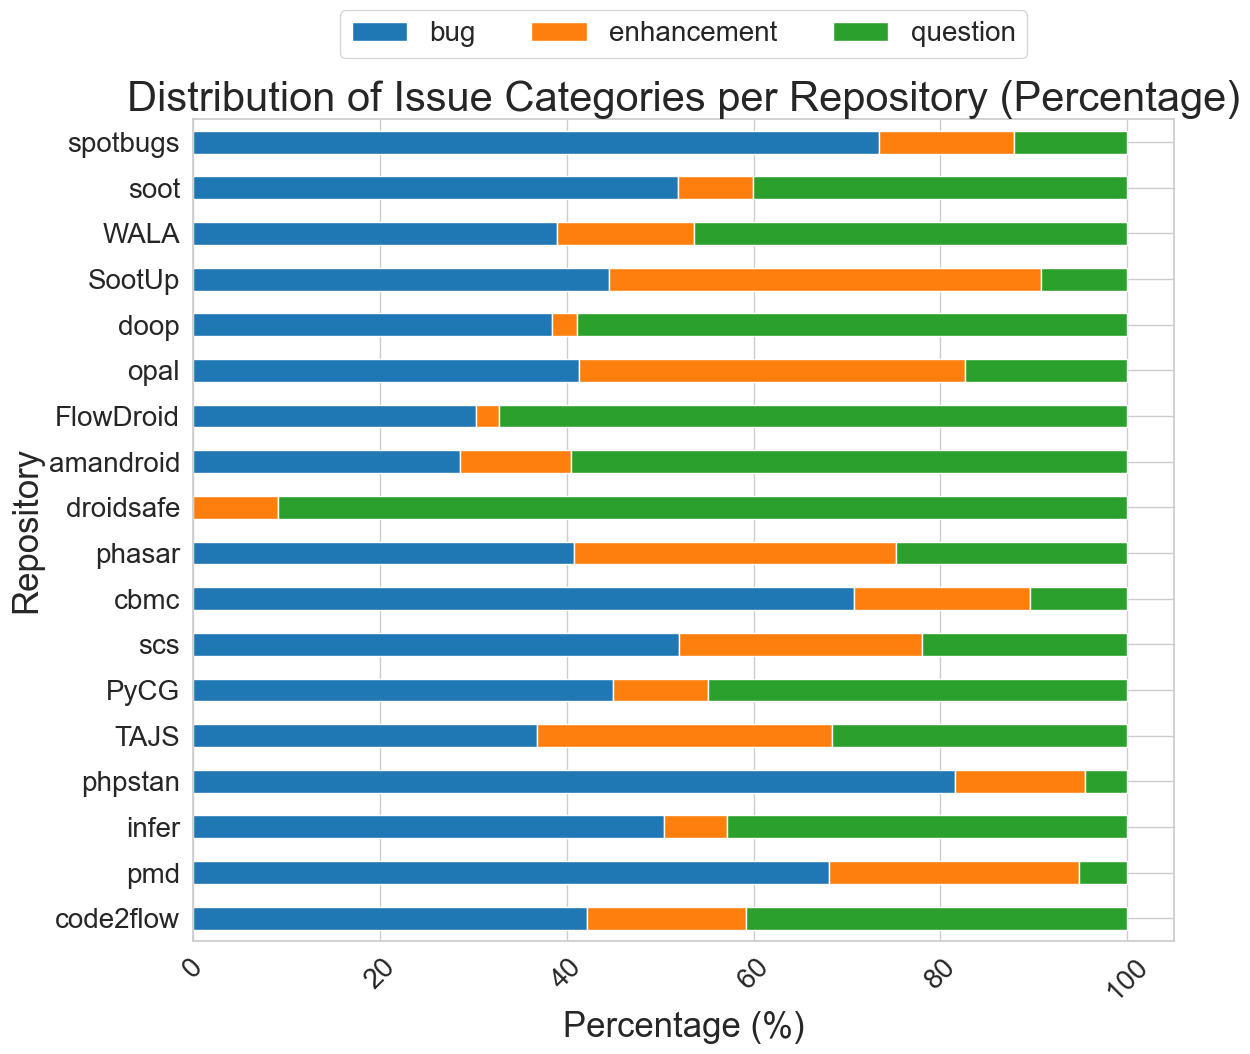

In [12]:
# Q2. the distribution of the labels of the issues
# located in the catiss_classification folder in analysis/issues/catiss_classification
per_repo_df = issues.groupby(['tool_name', 'prop:category']).size().unstack(fill_value=0)
# Convert counts to percentages for each repository
per_repo_percent = per_repo_df.div(per_repo_df.sum(axis=1), axis=0) * 100
per_repo_percent = per_repo_percent.reindex(TOOLS_ORDER[::-1])

# Replace the previous plot with the percentage plot
per_repo_percent.plot(kind='barh', stacked=True, figsize=(12, 10), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Issue Categories per Repository (Percentage)', fontsize=30)
plt.xlabel('Percentage (%)', fontsize=25)
plt.ylabel('Repository', fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.legend(loc='upper center', fontsize=20, bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.savefig('../../results/figures/common_properties/per_repo/category.pdf', dpi=300)
plt.show()

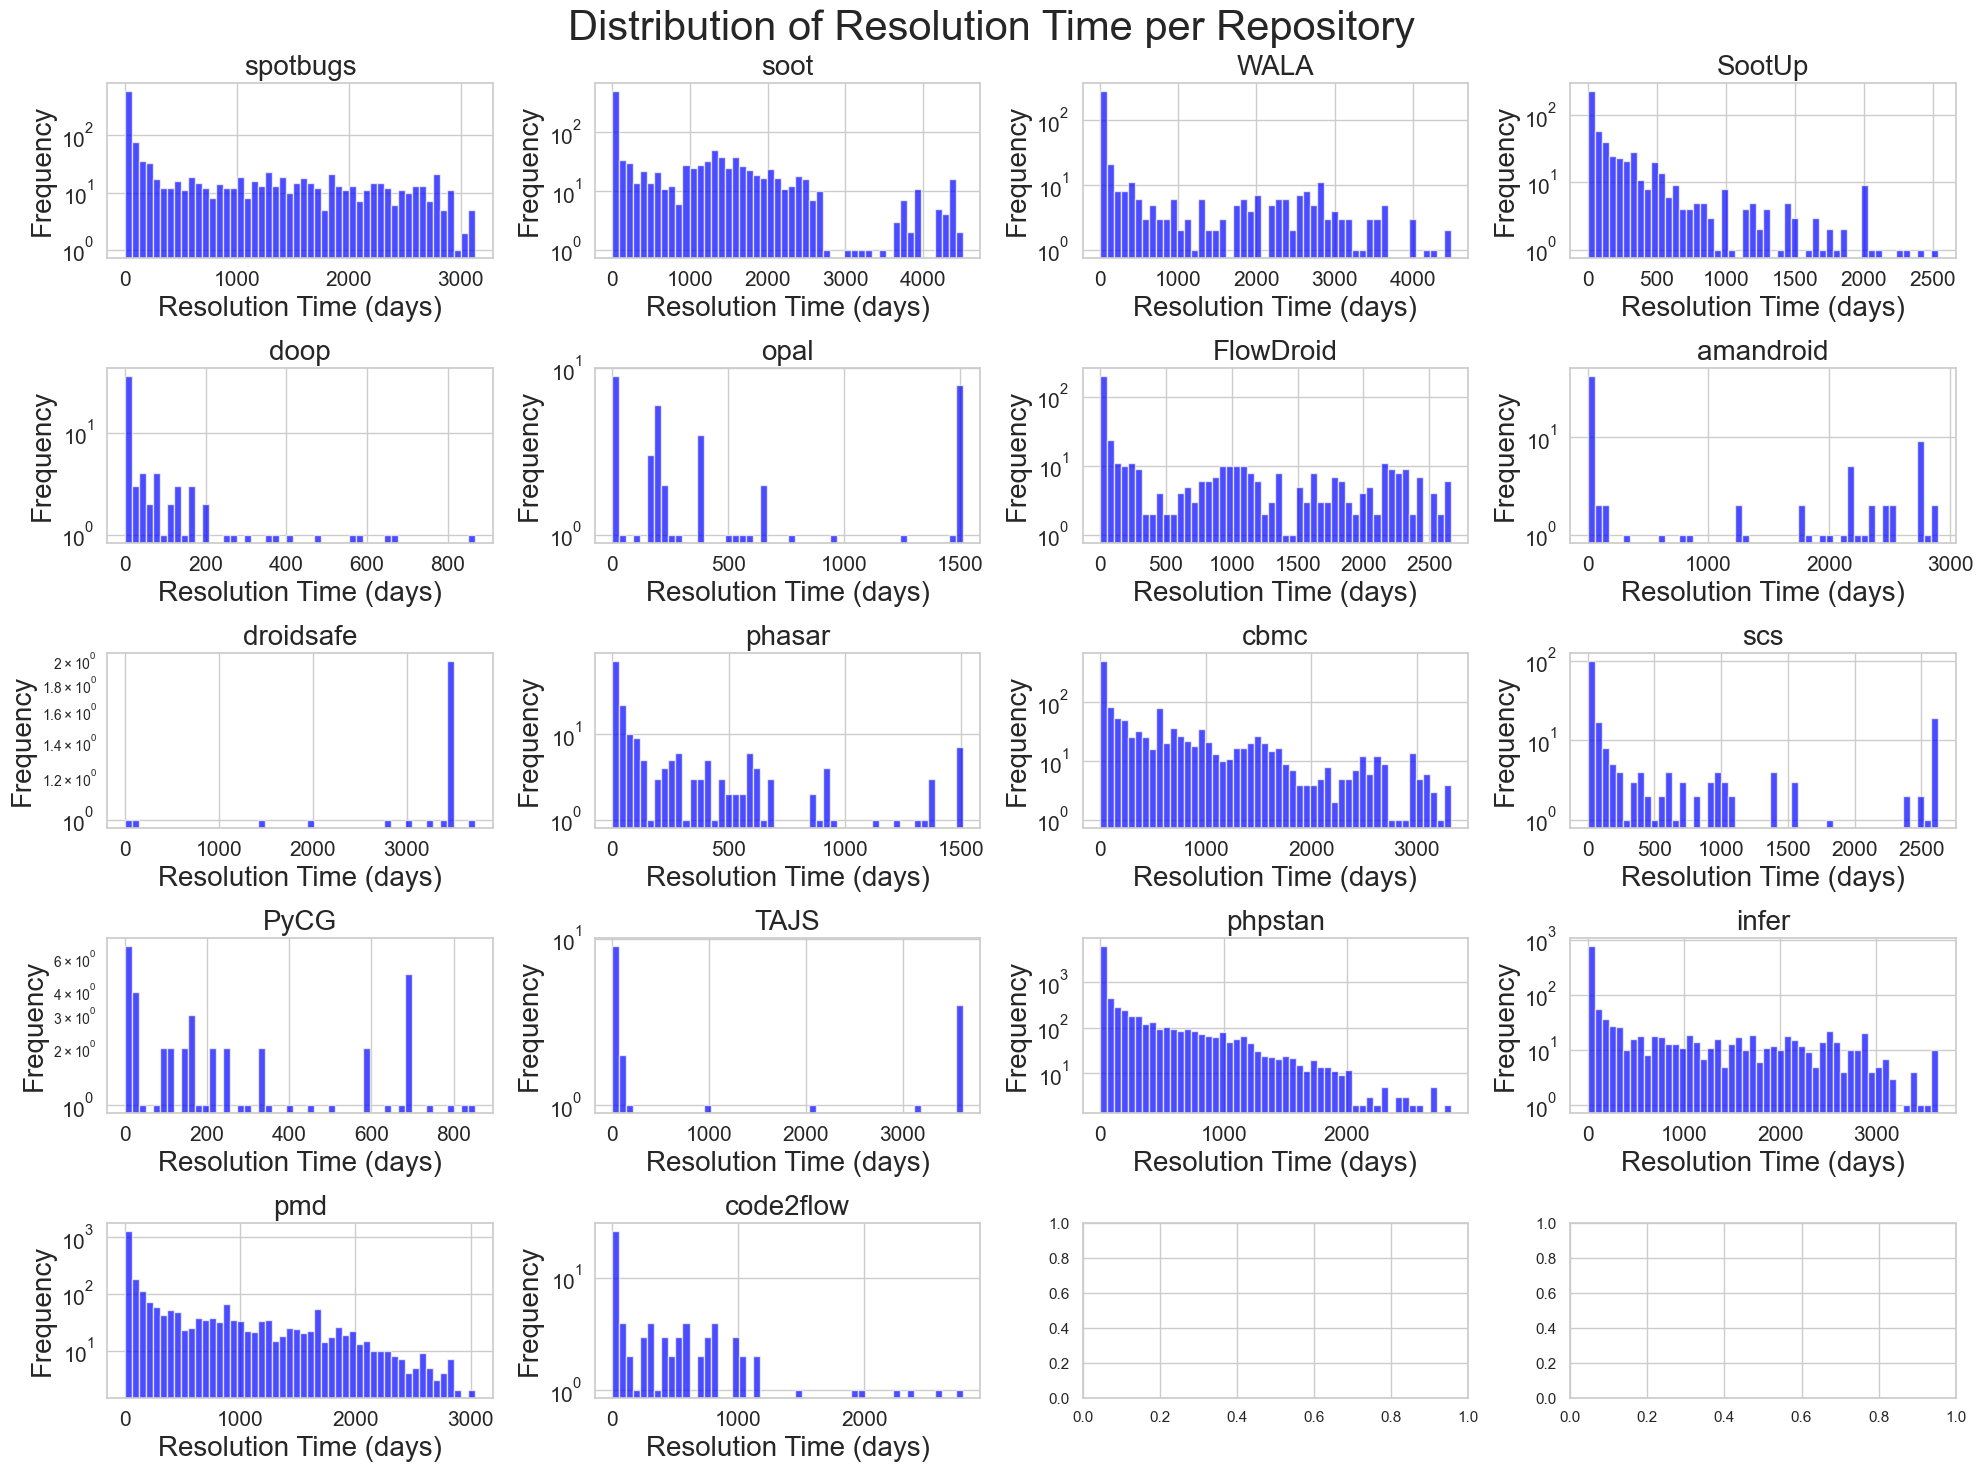

In [13]:
# Q3. The distribution of the time taken to resolve issues
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

# flatten the axes array for easy iteration
axes = ax.flatten()

for i, repo in enumerate(TOOLS_ORDER):
    repo_data = issues[issues['tool_name'] == repo]
    axes[i].hist(repo_data['prop:resolution'], bins=50, alpha=0.7, label='Closed Issues', color='blue')

    axes[i].set_title(repo, fontsize=20)
    axes[i].set_xlabel('Resolution Time (days)', fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].tick_params(axis='both', which='minor', labelsize=10)
    axes[i].grid(True)
    axes[i].set_yscale('log')

fig.suptitle('Distribution of Resolution Time per Repository', fontsize=30)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/resolution.pdf', dpi=300)
plt.show()

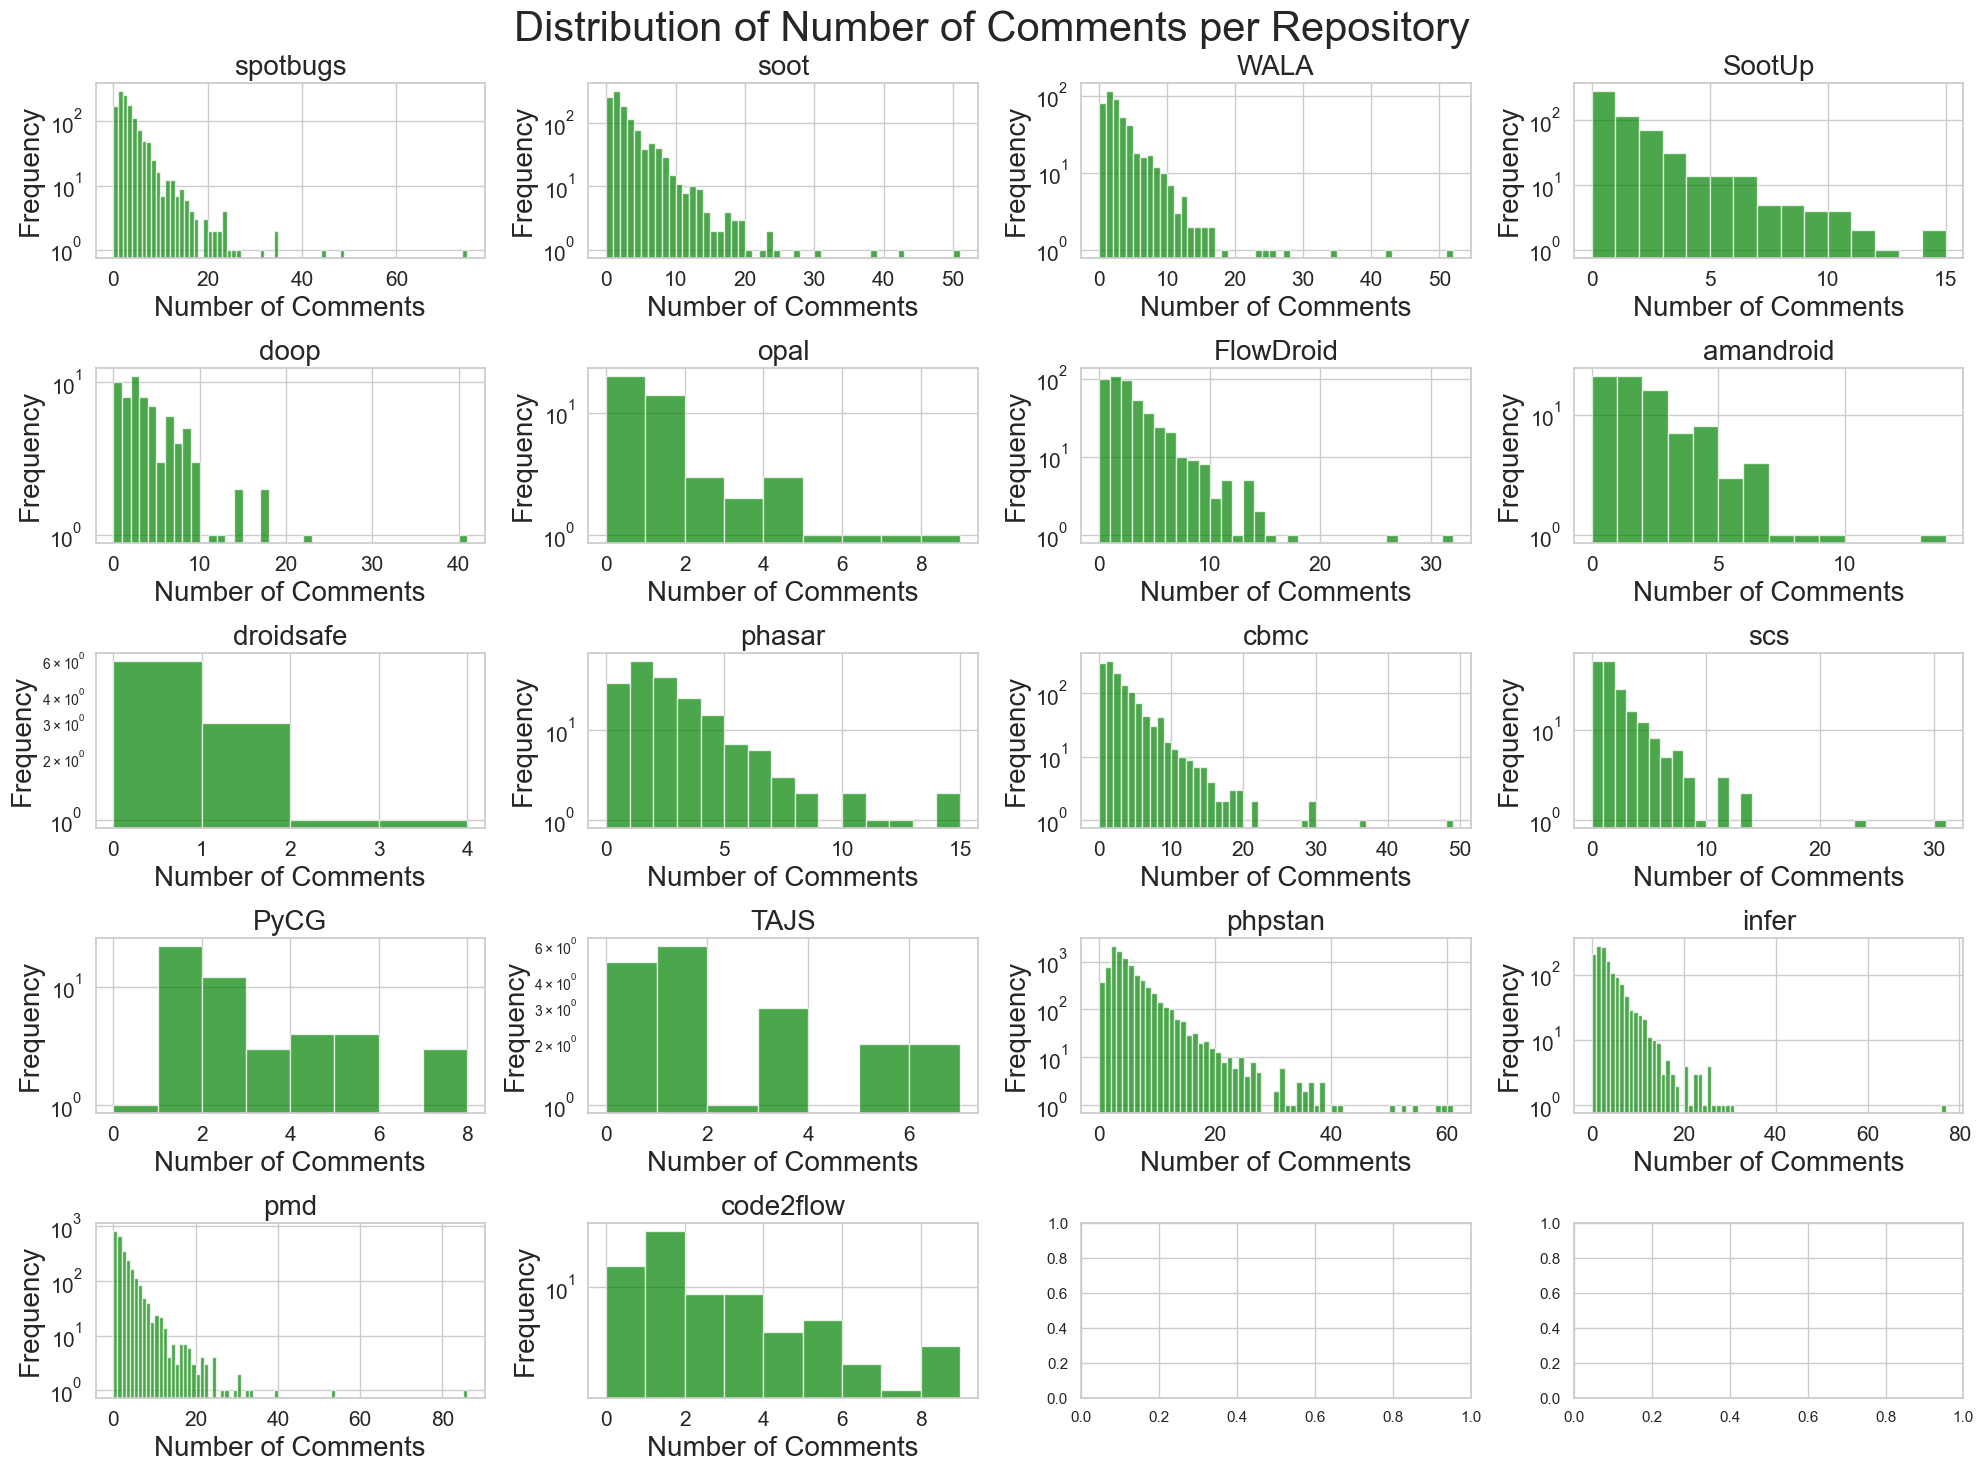

In [14]:
# Q4. The distribution of the number of comments for each issue
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

axes = ax.flatten()

for i, repo in enumerate(TOOLS_ORDER):
    repo_data = issues[issues['tool_name'] == repo]
    axes[i].hist(repo_data['prop:comments'], bins=range(0, repo_data['prop:comments'].max() + 1), alpha=0.7, label='Comments', color='green')

    axes[i].set_title(repo, fontsize=20)
    axes[i].set_xlabel('Number of Comments', fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].tick_params(axis='both', which='minor', labelsize=10)
    axes[i].grid(True)
    axes[i].set_yscale('log')

fig.suptitle('Distribution of Number of Comments per Repository', fontsize=30)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/comments.pdf', dpi=300)
plt.show()

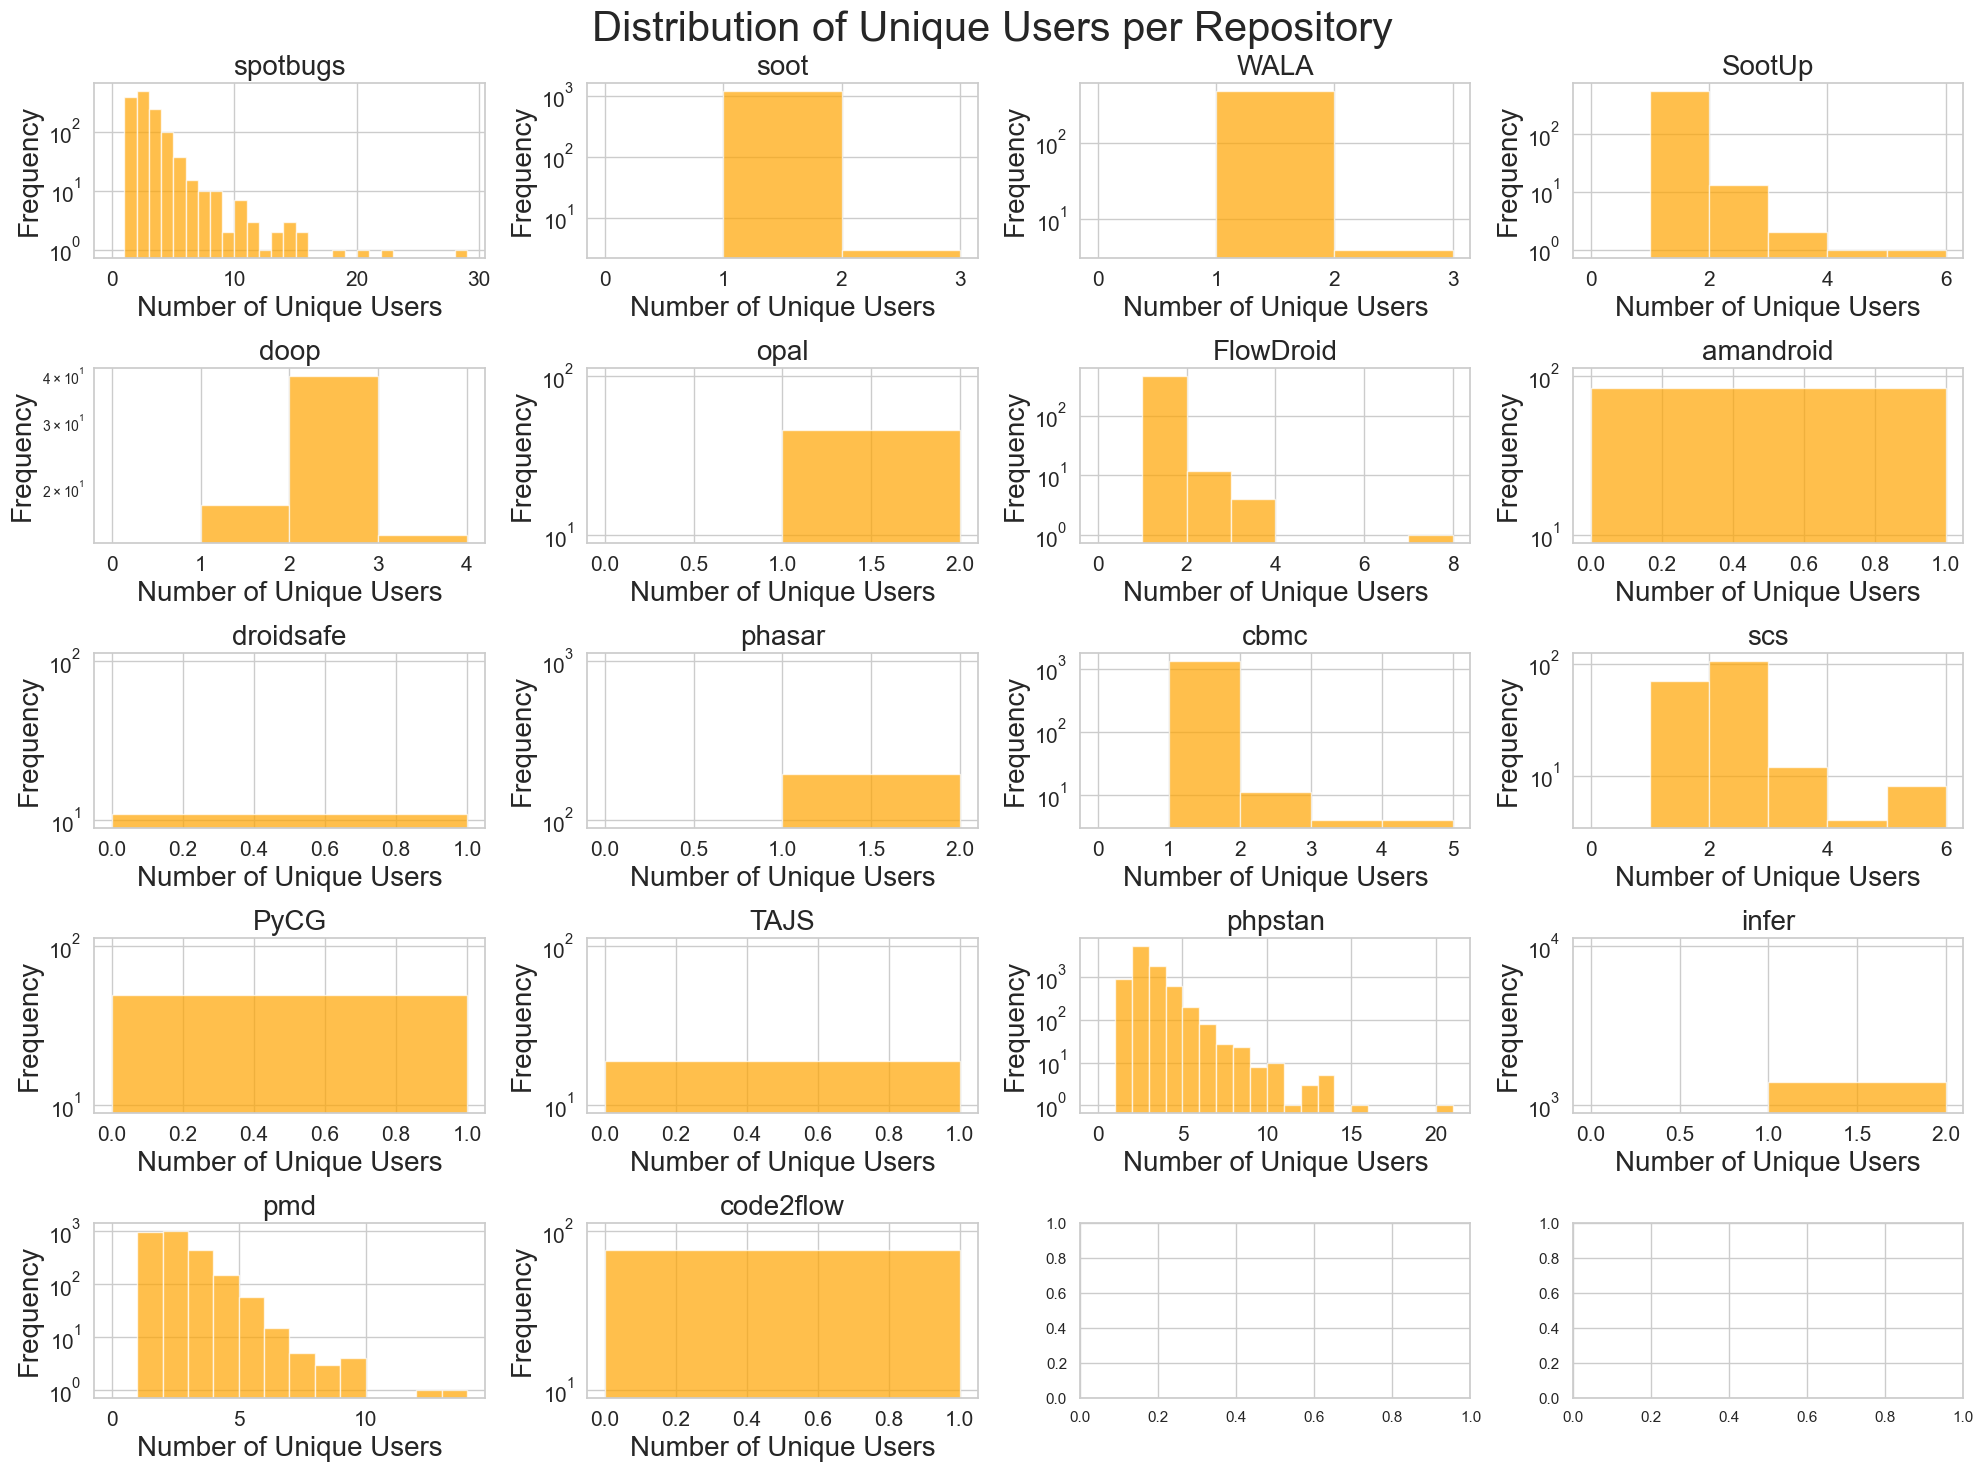

In [15]:
# Q5. The distribution of the number of unique users participating in each issue
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = ax.flatten()

for i, repo in enumerate(TOOLS_ORDER):
    repo_data = issues[issues['tool_name'] == repo]
    axes[i].hist(repo_data['prop:users'], bins=range(0, repo_data['prop:users'].max() + 1), alpha=0.7, label='Unique Users', color='orange')

    axes[i].set_title(repo, fontsize=20)
    axes[i].set_xlabel('Number of Unique Users', fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].tick_params(axis='both', which='minor', labelsize=10)
    axes[i].set_yscale('log')
    axes[i].grid(True)

fig.suptitle('Distribution of Unique Users per Repository', fontsize=30)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/users.pdf', dpi=300)
plt.show()

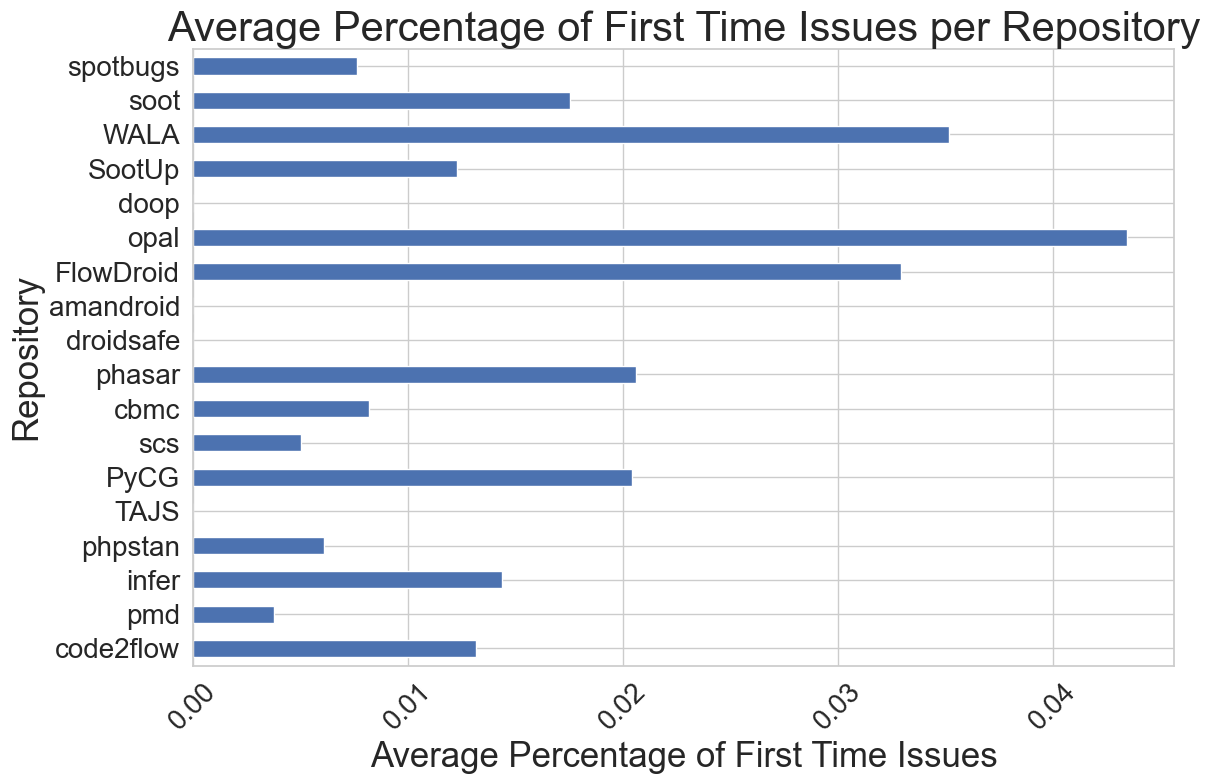

In [16]:
# Q7. The distribution of first time issues
per_repo_first_time_issues = issues.groupby('tool_name')['prop:first'].mean()
per_repo_first_time_issues = per_repo_first_time_issues.reindex(TOOLS_ORDER[::-1])
# Plotting the distribution of first time issues
per_repo_first_time_issues.plot(kind='barh', figsize=(12, 8))
plt.title('Average Percentage of First Time Issues per Repository', fontsize=30)
plt.ylabel('Repository', fontsize=25)
plt.xlabel('Average Percentage of First Time Issues', fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/first.pdf', dpi=300)
plt.show()

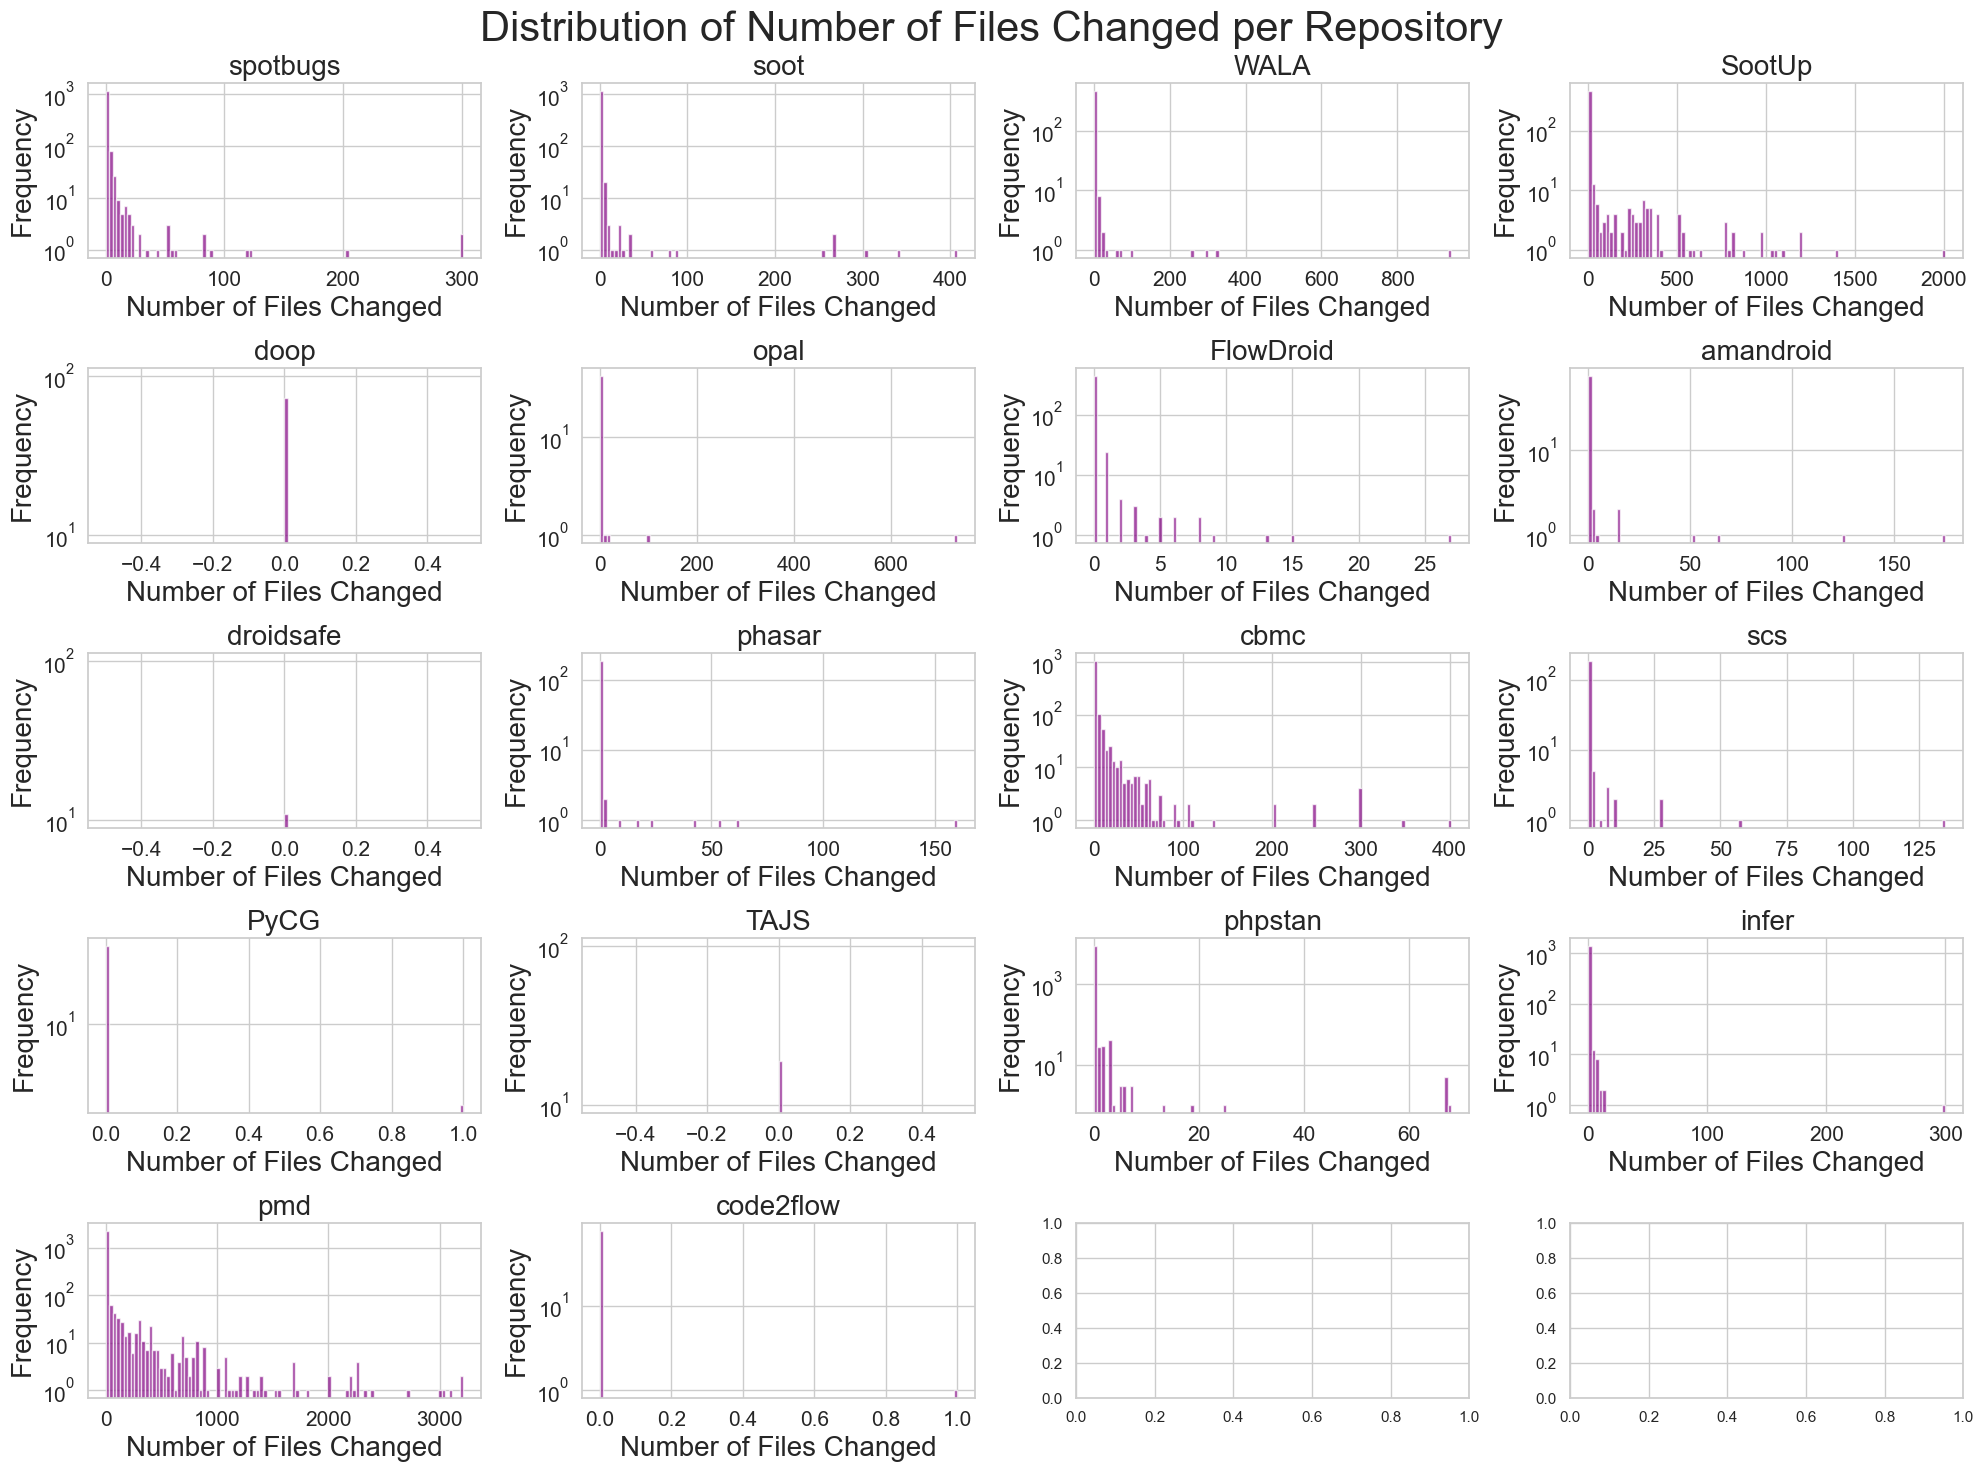

In [17]:
# The distribution of the number of files changed per issue
per_repo_files_changed = issues.groupby('tool_name')['prop:files'].mean()

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = ax.flatten()
for i, repo in enumerate(TOOLS_ORDER):
    repo_data = issues[issues['tool_name'] == repo]
    axes[i].hist(repo_data['prop:files'], bins=100, alpha=0.7, label='Files Changed', color='purple')

    axes[i].set_title(repo, fontsize=20)
    axes[i].set_xlabel('Number of Files Changed', fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].tick_params(axis='both', which='minor', labelsize=10)
    axes[i].grid(True)
    axes[i].set_yscale('log')

fig.suptitle('Distribution of Number of Files Changed per Repository', fontsize=30)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/files.pdf', dpi=300)
plt.show()

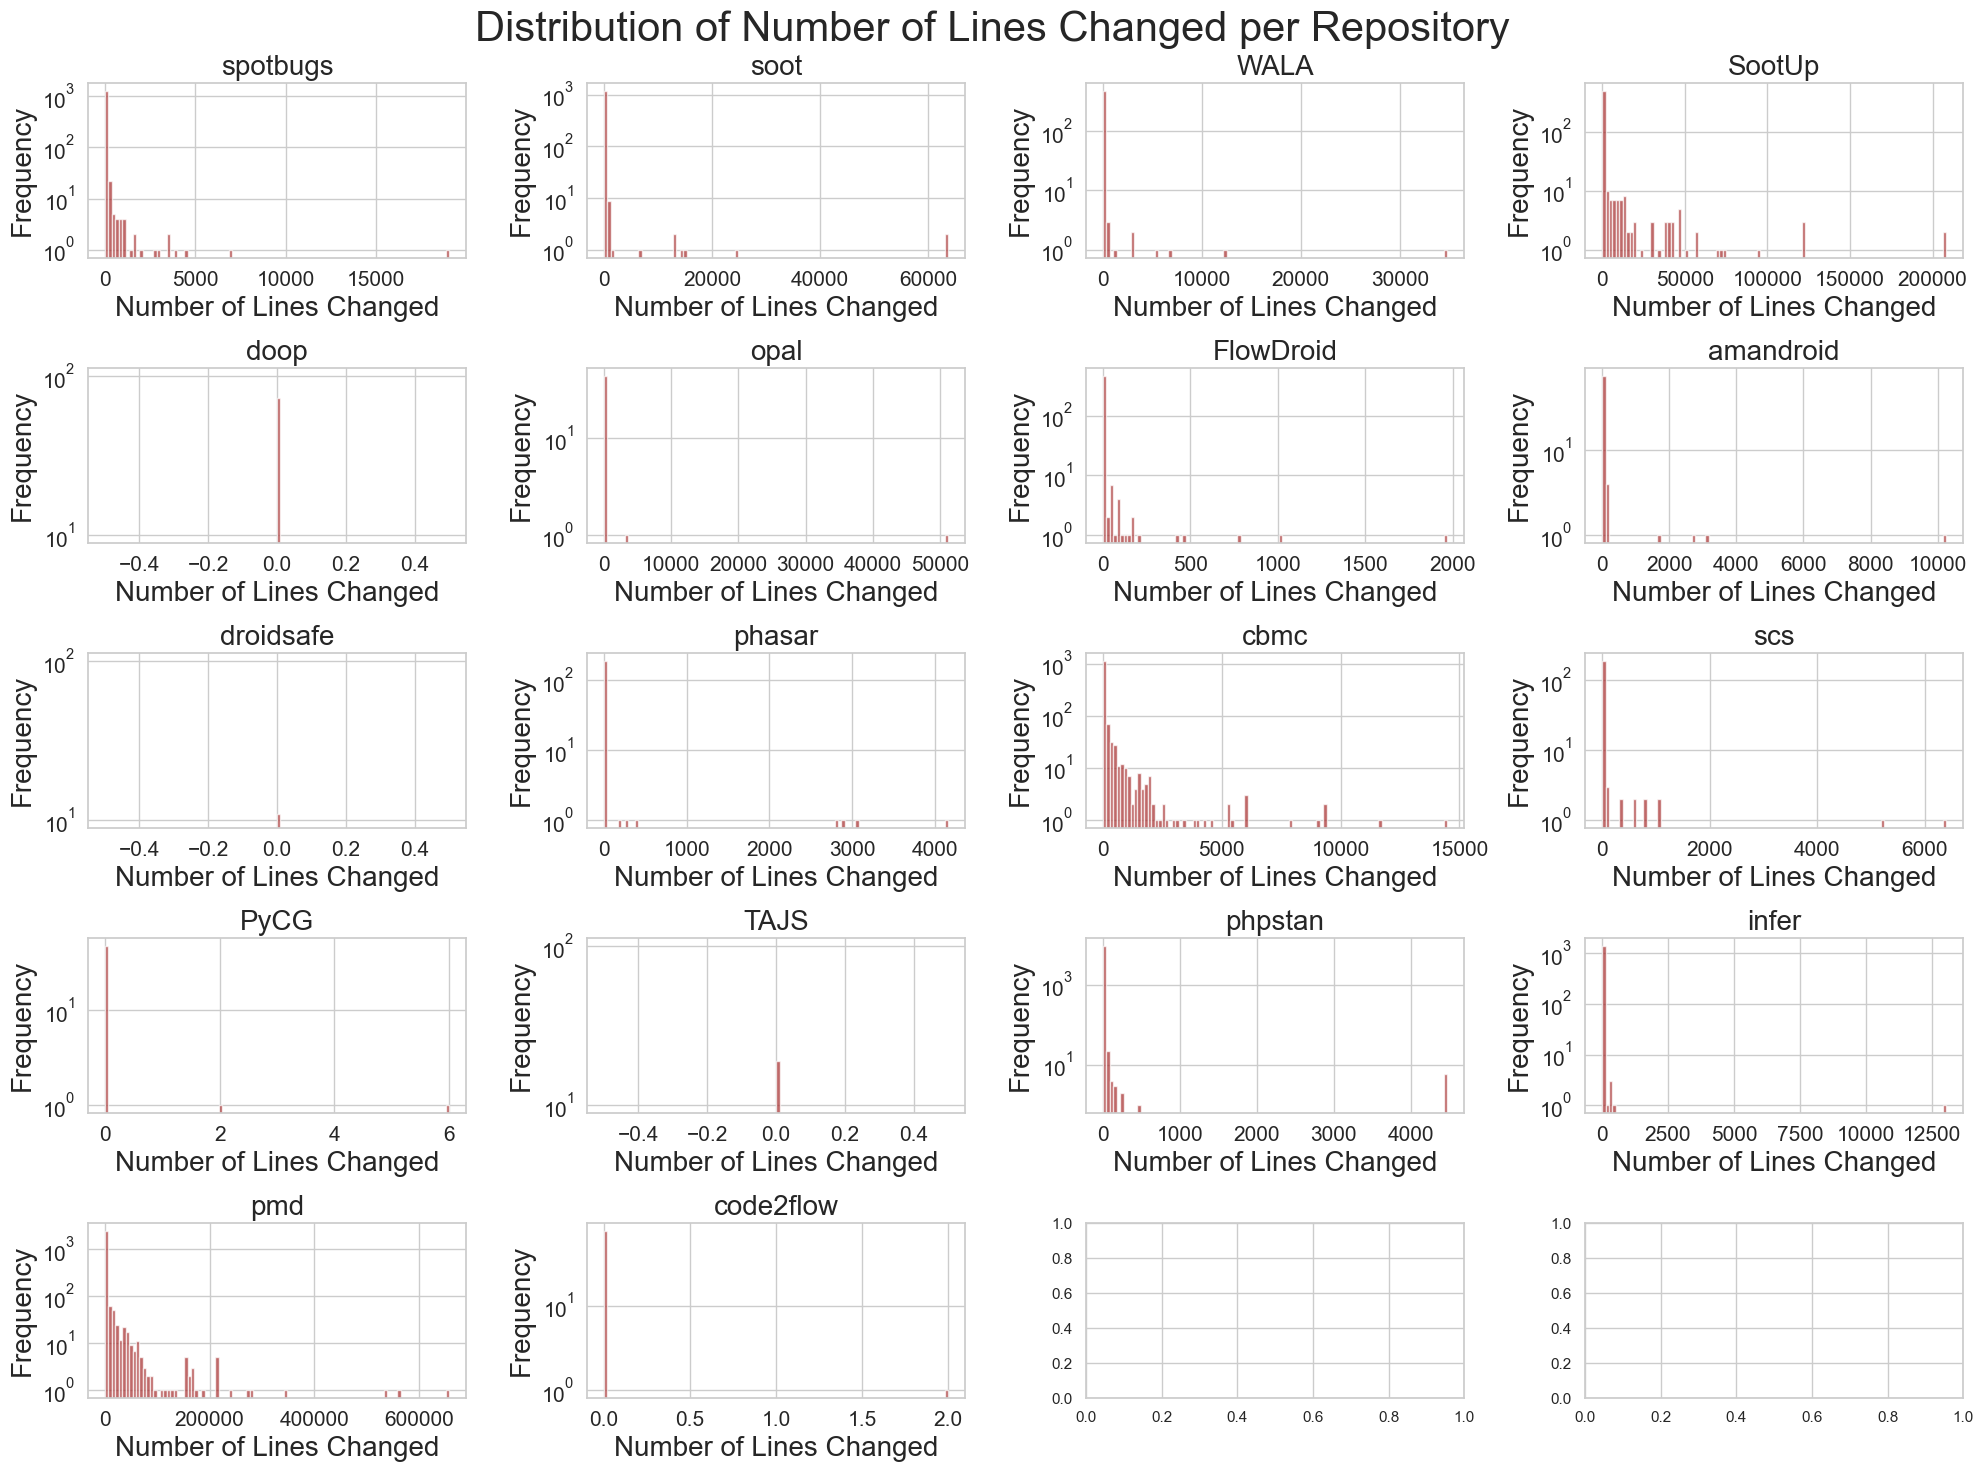

In [18]:
# Q10. The distribution of the number of lines changed per issue
per_repo_lines_changed = issues.groupby('tool_name')['prop:loc'].mean()

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = ax.flatten()

for i, repo in enumerate(TOOLS_ORDER):
    repo_data = issues[issues['tool_name'] == repo]
    axes[i].hist(repo_data['prop:loc'], bins=100, alpha=0.7, label='Lines Changed', color='brown')

    axes[i].set_title(repo, fontsize=20)
    axes[i].set_xlabel('Number of Lines Changed', fontsize=20)
    axes[i].set_ylabel('Frequency', fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    axes[i].tick_params(axis='both', which='minor', labelsize=10)
    axes[i].grid(True)
    axes[i].set_yscale('log')

fig.suptitle('Distribution of Number of Lines Changed per Repository', fontsize=30)
plt.tight_layout()
plt.savefig('../../results/figures/common_properties/per_repo/loc.pdf', dpi=300)
plt.show()